In [29]:
# 판다스 1일차에 이어서 시작

In [30]:
import numpy as np
import pandas as pd

# numpy랑 pandas 활성화 시키기

In [31]:
dic = {
    1:np.random.randint(60,100,100),
    2:np.random.randint(60,100,100),
    3:np.random.randint(60,100,100),
    4:np.random.randint(60,100,100),
    5:np.random.randint(60,100,100),
    6:np.random.randint(60,100,100),
    7:np.random.randint(60,100,100),
    8:np.random.randint(60,100,100),
    9:np.random.randint(60,100,100),
    10:np.random.randint(60,100,100),
    11:np.random.randint(60,100,100),
    12:np.random.randint(60,100,100),
}

# 60~100까지 100개의 자료 뽑아오기 총 10개

In [32]:
df = pd.DataFrame(dic)

# DataFrame 정의하기

In [33]:
df.columns = [str(i)+'월' for i in df.columns ]

# 1~12를 1월 12월로 바꿔주기

In [34]:
df.rename(columns={ i:'0'+i for i in df.columns[df.columns.str.len() <3]},inplace=True)

# 1월~9월을 01월 ~ 09월로 바꿔주기

In [35]:
df['total'] = df.values.sum(axis=1)

# 1~100까지 1~12월의 합계 각각 구해주기

In [36]:
df['avg'] = np.around(df.iloc[:,:-2].mean(axis=1),2)

# 평균 구해주기

In [37]:
df['best_month'] = df.columns[np.argmax(df.iloc[:,:-2].values,axis=1)]

# argmax구해서 제일 점수가 높은 달 구해주기

In [38]:
df['worst_month'] = df.columns[np.argmin(df.iloc[:,:-3].values,axis=1)]

# argmin 구해서 제일 점수가 높은 달 구해주기


In [39]:
df = df.iloc[np.argsort(df.total.values)[::-1],:]
df.index =  np.arange(1,df.shape[0]+1)

# 총합이 높은순으로 정렬하기

# 정렬후 새로 index 정의해주기

In [40]:
arr = np.sum(df.iloc[:,:-2] <= 70, axis=1)
df['score'] = np.where(arr <=1 ,'우수',
             np.where(arr<=3, '보통',
                      np.where(arr<=5,'저조','아주저조')))

# 처음에 바로 하면되는데 이미 바뀐후에는 에러가 뜬다.

In [41]:
df

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,total,avg,best_month,worst_month,score
1,92,77,79,77,75,90,96,98,96,98,99,94,1071,88.82,11월,05월,우수
2,96,98,89,66,91,96,73,81,94,99,83,92,1058,87.82,10월,04월,우수
3,78,95,95,97,73,66,94,79,82,85,96,93,1033,85.45,04월,06월,우수
4,96,89,96,72,77,82,98,79,73,87,85,92,1026,84.91,07월,04월,우수
5,73,92,99,92,95,81,77,80,60,78,98,95,1020,84.09,03월,09월,우수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,82,79,87,62,72,63,70,80,95,64,86,61,901,76.36,09월,12월,저조
97,72,67,62,70,99,66,67,70,67,70,87,98,895,72.45,05월,03월,아주저조
98,79,84,87,73,79,64,60,71,73,76,80,65,891,75.09,03월,07월,보통
99,73,88,60,60,73,97,86,89,61,77,66,61,891,75.45,06월,03월,저조


In [42]:
# 1일차에는 열을 만들었다면 이제는 행을 만들어주기

In [43]:
# 인덱스 재설정
df.reset_index(inplace=True)

In [44]:
#  index coulmn 제거
df.drop(columns=['index'],inplace=True)
df.head()

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,total,avg,best_month,worst_month,score
0,92,77,79,77,75,90,96,98,96,98,99,94,1071,88.82,11월,05월,우수
1,96,98,89,66,91,96,73,81,94,99,83,92,1058,87.82,10월,04월,우수
2,78,95,95,97,73,66,94,79,82,85,96,93,1033,85.45,04월,06월,우수
3,96,89,96,72,77,82,98,79,73,87,85,92,1026,84.91,07월,04월,우수
4,73,92,99,92,95,81,77,80,60,78,98,95,1020,84.09,03월,09월,우수


In [45]:
# 위 식으로 index column을 지우려고 df.drop안에 columnm을 했는데
# level_0이라는 녀석이 나왔을 때는 column 대신 level_0을 적자

In [46]:
# 에러가 아닌데 빨간창이 뜰경우 
# import warnings
# warinings.filterwarnings(action='ignore')을 해주면 없어지는데
# 왜 에러가 뜨는지 아는것도 나쁘지않다

In [47]:
df.head(2)

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,total,avg,best_month,worst_month,score
0,92,77,79,77,75,90,96,98,96,98,99,94,1071,88.82,11월,05월,우수
1,96,98,89,66,91,96,73,81,94,99,83,92,1058,87.82,10월,04월,우수


In [48]:
df.iloc[:,:13]

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,total
0,92,77,79,77,75,90,96,98,96,98,99,94,1071
1,96,98,89,66,91,96,73,81,94,99,83,92,1058
2,78,95,95,97,73,66,94,79,82,85,96,93,1033
3,96,89,96,72,77,82,98,79,73,87,85,92,1026
4,73,92,99,92,95,81,77,80,60,78,98,95,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,82,79,87,62,72,63,70,80,95,64,86,61,901
96,72,67,62,70,99,66,67,70,67,70,87,98,895
97,79,84,87,73,79,64,60,71,73,76,80,65,891
98,73,88,60,60,73,97,86,89,61,77,66,61,891


In [49]:
df.iloc[:,:13].sum(axis=0)

# Series 데이터

01월       7986
02월       8107
03월       7964
04월       7908
05월       8062
06월       7852
07월       7834
08월       8004
09월       7926
10월       8086
11월       7976
12월       7997
total    95702
dtype: int64

In [50]:
total = df.iloc[:,:13].sum(axis=0)

In [51]:
avg = df.avg.mean()

In [52]:
best_month = np.unique(df.best_month.values)[np.argmax(np.unique(df.best_month.values,return_counts=True)[1])]

In [53]:
#  best_month 열에서 가장 많이 등장한 값 자체를 반환하는 코드

In [54]:
worst_month = np.unique(df.worst_month.values)[np.argmin(np.unique(df.worst_month.values,return_counts=True)[1])]

In [55]:
unique_name = np.unique(df.score,return_counts=True)[0]
unique_cnt = np.unique(df.score,return_counts=True)[1]
best_index = np.argmax(unique_cnt)
freq_score = unique_name[best_index] 

In [56]:
print(unique_name)
print(unique_cnt)
print(freq_score)

['보통' '아주저조' '우수' '저조']
[46  4 13 37]
보통


In [57]:
# total,avg,best_month,worst_month,freq_score

In [58]:
np.concatenate(total.values,avg)

# numpy는 한종류 데이터로만 이루어져서 타입에러

TypeError: 'float' object cannot be interpreted as an integer

In [59]:
new_data = pd.concat([total,
               pd.Series(avg),
               pd.Series(best_month),
               pd.Series(worst_month),
               pd.Series(freq_score)])

In [60]:
df.loc[100] = new_data.values

# 100행에 new data가 들어갔따

In [61]:
df

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,total,avg,best_month,worst_month,score
0,92,77,79,77,75,90,96,98,96,98,99,94,1071,88.8200,11월,05월,우수
1,96,98,89,66,91,96,73,81,94,99,83,92,1058,87.8200,10월,04월,우수
2,78,95,95,97,73,66,94,79,82,85,96,93,1033,85.4500,04월,06월,우수
3,96,89,96,72,77,82,98,79,73,87,85,92,1026,84.9100,07월,04월,우수
4,73,92,99,92,95,81,77,80,60,78,98,95,1020,84.0900,03월,09월,우수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,72,67,62,70,99,66,67,70,67,70,87,98,895,72.4500,05월,03월,아주저조
97,79,84,87,73,79,64,60,71,73,76,80,65,891,75.0900,03월,07월,보통
98,73,88,60,60,73,97,86,89,61,77,66,61,891,75.4500,06월,03월,저조
99,66,69,60,70,60,68,75,93,67,86,64,84,862,70.7300,08월,03월,아주저조


In [62]:
def unique_cnt(x):
    unique_name = np.unique(x,return_counts=True)[0]
    unique_cnt = np.unique(x,return_counts=True)[1]
    freq_cnt_index = np.argmax(unique_cnt)
    result = unique_name[freq_cnt_index]
    return result

In [63]:
unique_cnt(df.score)

'보통'

In [64]:
df.loc[:,['best_month','worst_month','score']]

,best_month,worst_month,score
0,11월,05월,우수
1,10월,04월,우수
2,04월,06월,우수
3,07월,04월,우수
4,03월,09월,우수
...,...,...,...
96,05월,03월,아주저조
97,03월,07월,보통
98,06월,03월,저조
99,08월,03월,아주저조


In [65]:
df.loc[:,['best_month','worst_month','score']].apply(unique_cnt,axis=0)

best_month     05월
worst_month    03월
score           보통
dtype: object

In [66]:
f = lambda x: np.unique(x, return_counts=True)[0][np.argmax(np.unique(x, return_counts=True)[1])]

In [67]:
f(df.best_month)

'05월'

In [68]:
np.random.seed(3)

dic = {
    'a':np.random.randint(1,10,5),
    'b':np.random.randint(1,10,5)
}

df1= pd.DataFrame(dic)

In [69]:
df1

,a,b
0,9,6
1,4,4
2,9,6
3,9,8
4,1,7


In [70]:
# df1의 coulmn

# a>b 이면 a//3
# a<b 이면 b//2
# a==b 이면 a*b

In [71]:
def xx(x):
    if x[0] > x[1]:
        result1 = x[0] // 3
    elif x[0] < x[1]:
        result1 = x[1] // 2
    else:
        result1 = x[0] * x[1]
    return result1

# result가 앞에 있는 result랑 겹처서 에러가 뜰떄는 이름을 바꿔줄것

In [72]:
df1

,a,b
0,9,6
1,4,4
2,9,6
3,9,8
4,1,7


In [73]:
xx(df1.iloc[2,:].values)

3

In [74]:
df1['result1'] = df1.apply(xx,axis=1)

In [75]:
df1.iloc[4,2] = 3

In [76]:
df1

,a,b,result1
0,9,6,3
1,4,4,16
2,9,6,3
3,9,8,3
4,1,7,3


In [77]:
dic = {
    '이름':['서준','우현','인아'],
    '수학':[80,80,70],
    '영어':[98,89,95],
    '음악':[85,95,100],
}
df2 = pd.DataFrame(dic)
df2

,이름,수학,영어,음악
0,서준,80,98,85
1,우현,80,89,95
2,인아,70,95,100


In [78]:
df2.transpose().T

,이름,수학,영어,음악
0,서준,80,98,85
1,우현,80,89,95
2,인아,70,95,100


In [79]:
df2.set_index('이름').loc['서준','수학']

80

In [80]:
df2

,이름,수학,영어,음악
0,서준,80,98,85
1,우현,80,89,95
2,인아,70,95,100


In [81]:
df2.loc[3] = ['서준',90,80,70]

In [82]:
df2

,이름,수학,영어,음악
0,서준,80,98,85
1,우현,80,89,95
2,인아,70,95,100
3,서준,90,80,70


In [83]:
df2.set_index('이름').loc['서준',:]

,수학,영어,음악
이름,,,
서준,80,98,85
서준,90,80,70


In [84]:
df2.loc[df2.이름 =='서준',:]

# set index랑 살짝 다르다

,이름,수학,영어,음악
0,서준,80,98,85
3,서준,90,80,70


In [85]:
pd.__version__

'1.4.4'

In [86]:
np.__version__

'1.21.5'

In [87]:
# set_index(내가가지고 있는 column)
# reset_index(index column 재변경)  -> 인덱스"--> df coulmn 변경
# reindex(인덱스) => 재할당
# df.index = 인덱스 ==> 재할당

In [88]:
df

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,total,avg,best_month,worst_month,score
0,92,77,79,77,75,90,96,98,96,98,99,94,1071,88.8200,11월,05월,우수
1,96,98,89,66,91,96,73,81,94,99,83,92,1058,87.8200,10월,04월,우수
2,78,95,95,97,73,66,94,79,82,85,96,93,1033,85.4500,04월,06월,우수
3,96,89,96,72,77,82,98,79,73,87,85,92,1026,84.9100,07월,04월,우수
4,73,92,99,92,95,81,77,80,60,78,98,95,1020,84.0900,03월,09월,우수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,72,67,62,70,99,66,67,70,67,70,87,98,895,72.4500,05월,03월,아주저조
97,79,84,87,73,79,64,60,71,73,76,80,65,891,75.0900,03월,07월,보통
98,73,88,60,60,73,97,86,89,61,77,66,61,891,75.4500,06월,03월,저조
99,66,69,60,70,60,68,75,93,67,86,64,84,862,70.7300,08월,03월,아주저조


In [89]:
df.iloc[[1,2,3],:]



,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,total,avg,best_month,worst_month,score
1,96,98,89,66,91,96,73,81,94,99,83,92,1058,87.82,10월,04월,우수
2,78,95,95,97,73,66,94,79,82,85,96,93,1033,85.45,04월,06월,우수
3,96,89,96,72,77,82,98,79,73,87,85,92,1026,84.91,07월,04월,우수


In [90]:
df = df.iloc[np.random.choice(df.index,df.index.size,replace=False),:]

In [91]:
df

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,total,avg,best_month,worst_month,score
45,72,96,65,84,99,71,75,80,86,87,75,71,961,80.91,05월,03월,우수
5,90,81,78,78,91,91,79,64,97,92,92,78,1011,84.82,09월,08월,우수
6,88,90,88,86,79,74,95,72,62,94,81,99,1008,82.64,12월,09월,우수
41,92,85,63,86,92,98,72,94,91,60,73,60,966,82.36,06월,10월,보통
55,68,98,68,65,65,73,83,91,92,72,93,81,949,78.91,02월,04월,저조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,77,60,92,82,92,73,64,96,80,84,76,92,968,79.64,08월,02월,보통
93,83,61,78,73,87,62,88,79,62,95,72,65,905,76.36,10월,02월,저조
44,69,87,97,85,67,77,69,99,79,60,87,85,961,79.64,08월,10월,저조
20,62,79,66,96,99,77,77,64,80,95,96,95,986,81.00,05월,01월,보통


In [92]:
df.sort_index()

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,total,avg,best_month,worst_month,score
0,92,77,79,77,75,90,96,98,96,98,99,94,1071,88.8200,11월,05월,우수
1,96,98,89,66,91,96,73,81,94,99,83,92,1058,87.8200,10월,04월,우수
2,78,95,95,97,73,66,94,79,82,85,96,93,1033,85.4500,04월,06월,우수
3,96,89,96,72,77,82,98,79,73,87,85,92,1026,84.9100,07월,04월,우수
4,73,92,99,92,95,81,77,80,60,78,98,95,1020,84.0900,03월,09월,우수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,72,67,62,70,99,66,67,70,67,70,87,98,895,72.4500,05월,03월,아주저조
97,79,84,87,73,79,64,60,71,73,76,80,65,891,75.0900,03월,07월,보통
98,73,88,60,60,73,97,86,89,61,77,66,61,891,75.4500,06월,03월,저조
99,66,69,60,70,60,68,75,93,67,86,64,84,862,70.7300,08월,03월,아주저조


In [93]:
df.sort_values('01월')

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월,total,avg,best_month,worst_month,score
70,60,87,77,67,78,87,79,96,63,75,98,66,933,78.8200,11월,01월,저조
76,60,67,68,81,66,87,78,89,72,77,98,84,927,76.6400,11월,01월,저조
73,61,69,90,65,95,87,95,65,77,94,67,66,931,78.6400,05월,01월,아주저조
86,61,87,97,73,76,66,60,67,89,95,73,73,917,76.7300,03월,07월,저조
20,62,79,66,96,99,77,77,64,80,95,96,95,986,81.0000,05월,01월,보통
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,98,95,65,91,81,61,87,66,97,93,61,83,978,81.3600,01월,06월,저조
57,98,79,64,75,78,95,74,68,98,68,80,70,947,79.7300,01월,03월,저조
92,98,73,95,79,84,67,64,61,66,84,62,73,906,75.7300,01월,08월,저조
51,99,90,79,92,71,72,85,69,92,60,72,72,953,80.0900,01월,10월,보통


In [94]:
# 2x2랑 3x3은 원래 3가지 계산 방법중에 뭘 써도 계산 안되는데
# 판다스는 없는곳에 Nan을 박아서 가능하게 한다

In [95]:
dic ={
    0:1,
    1:2,
    2:3,
}
s1 = pd.Series(dic)

In [96]:
s1

0    1
1    2
2    3
dtype: int64

In [97]:
s1 + 2

0    3
1    4
2    5
dtype: int64

In [98]:
s2 = s1.copy()
s2.index =[2,3,4]

In [99]:
s2

2    1
3    2
4    3
dtype: int64

In [100]:
s1.values + s2.values

array([2, 4, 6], dtype=int64)

In [101]:
s1 + s2

0    NaN
1    NaN
2    4.0
3    NaN
4    NaN
dtype: float64

In [102]:
df1 = pd.DataFrame(np.arange(1,5).reshape(2,2))
df2 = pd.DataFrame(np.arange(5,9).reshape(2,2))


In [103]:
df1

,0,1
0,1,2
1,3,4


In [104]:
df2

,0,1
0,5,6
1,7,8


In [105]:
df1 + df2

,0,1
0,6,8
1,10,12


In [106]:
df1.columns = ['a','b']
df2.columns = ['b','a'] 

In [107]:
df1+df2

# 위에꺼 크로스로 계산되네

,a,b
0,7,7
1,11,11


In [108]:
df2.columns = ['c','d']
df1 + df2

,a,b,c,d
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN


In [109]:
(df1+df2).shape

(2, 4)

In [110]:
df2.index = [2,3]
(df1+df2).shape

(4, 4)

In [111]:
df1+df2

,a,b,c,d
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [112]:
(s1+s2).fillna(0)

0    0.0
1    0.0
2    4.0
3    0.0
4    0.0
dtype: float64

In [113]:
df = pd.read_csv('train.csv')

In [114]:
df.to_csv('titanic.csv')

In [115]:
pd.read_csv('test.tsv')

FileNotFoundError: [Errno 2] No such file or directory: 'test.tsv'

In [ ]:
pd.read_csv('test.tsv', sep='\t')

In [ ]:
pd.read_csv('test.csv', sep=':',skiprows=[3])
# 하나 뺴고 가져오는 것

In [116]:
pd.read_csv('테스트.csv')

# cp949 기억하기

FileNotFoundError: [Errno 2] No such file or directory: '테스트.csv'

In [ ]:
pd.read_csv('테스트.csv').to_excel('test.xlsx')

In [117]:
pd.read_excel('test.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'test.xlsx'

In [118]:
# 지오코딩은 안된다

In [119]:
import seaborn as sns

In [120]:
# dir(sns)

In [121]:
df = sns.load_dataset('mpg')

In [122]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [123]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [124]:
df.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [125]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [126]:
df.shape

(398, 9)

In [127]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [128]:
x = np.random.randn(100)

In [129]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1ca858e3cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ca85fa96d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ca858eff40>],
 'medians': [<matplotlib.lines.Line2D at 0x1ca85fa9c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ca85fa9f40>],
 'means': []}

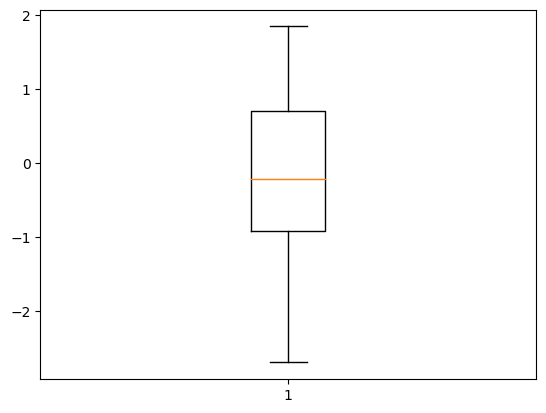

In [130]:
plt.boxplot(x)

In [131]:
# 25% -3시그마 75% +3시그마 이상치 

In [132]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [133]:
# origin, name이 있는데 안나왔다

In [134]:
df.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [135]:
df.origin.describe()

count     398
unique      3
top       usa
freq      249
Name: origin, dtype: object

In [136]:
df[['origin','name']].describe()

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [138]:
df.describe().loc['count']

mpg             398.0
cylinders       398.0
displacement    398.0
horsepower      392.0
weight          398.0
acceleration    398.0
model_year      398.0
Name: count, dtype: float64

In [139]:
df.count()

mpg             398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model_year      398
origin          398
name            398
dtype: int64

In [140]:
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [141]:
df.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [142]:
np.percentile(df.mpg.values,25)

# 25% 값

17.5

In [143]:
df.mpg.describe()['25%']

17.5

In [144]:
df.mpg.median()

23.0

In [145]:
df.mpg.describe()['50%']

23.0

In [146]:
df.mpg.std()

7.815984312565782

In [147]:
df.mpg.describe()['std']

7.815984312565782

In [148]:
# 표준편차를 구해봐요

In [149]:
x_ = df.mpg.sum()/ df.mpg.size

In [150]:
np.sqrt(np.sum((df.mpg- x_)**2))/(df.mpg.size-1)

0.39227300796963793

In [151]:
np.corrcoef(df.mpg,df.displacement)[0,1]

-0.804202824805898

In [152]:
df.corr()['mpg'][1:]

cylinders      -0.775396
displacement   -0.804203
horsepower     -0.778427
weight         -0.831741
acceleration    0.420289
model_year      0.579267
Name: mpg, dtype: float64

In [153]:
import matplotlib.pyplot as plt
plt.plot(df.mpg.values.sort(,df.accleratio.values))

SyntaxError: invalid syntax (1594944270.py, line 2)

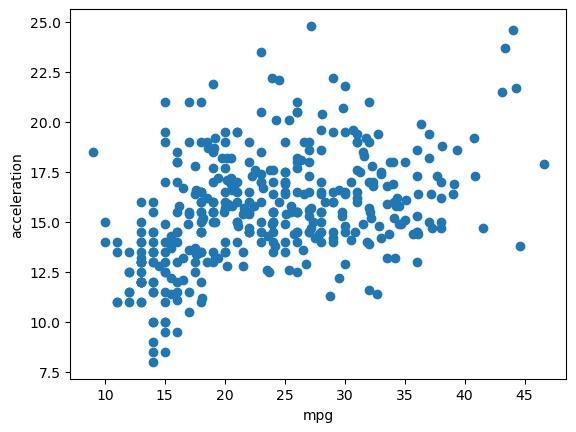

In [154]:
import matplotlib.pyplot as plt

plt.scatter(df.mpg, df.acceleration)
plt.xlabel('mpg')
plt.ylabel('acceleration')
plt.show()

<AxesSubplot:>

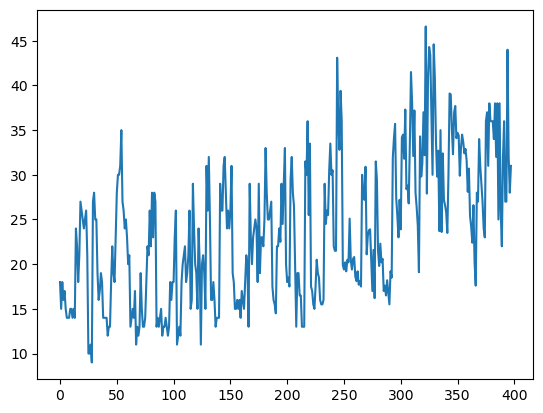

In [155]:
df.mpg.plot()

In [156]:
x = np.random.randint(0,2,50)

In [157]:
x = np.where(x==0,'male','female')


<BarContainer object of 50 artists>

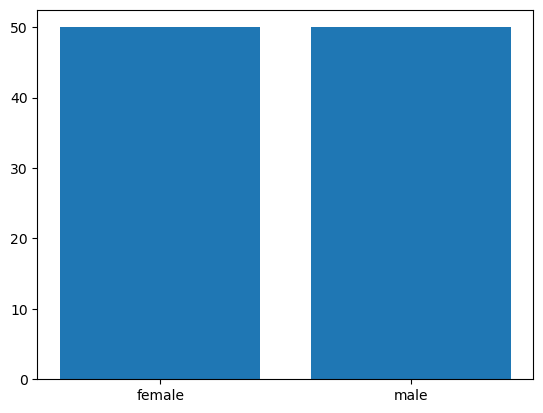

In [158]:
plt.bar(x,50)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  4.,  3.,  3.,  1.,  5.,  4.,  1.,  4.,  3.,
         8.,  7.,  3.,  8.,  8., 14.,  2.,  9.,  9., 16., 15., 18., 17.,
        23., 15., 16., 22., 17., 20., 20., 22., 19., 25., 16., 19., 24.,
        27., 25., 25., 29., 22., 21., 29., 22., 27., 14., 36., 22., 26.,
        26., 14., 23., 18., 14., 15.,  9., 18., 16.,  8., 10.,  8.,  7.,
         7.,  6., 11.,  3.,  7.,  3.,  6.,  3.,  3.,  4.,  1.,  3.,  1.,
         1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([-3.44271032, -3.3786789 , -3.31464747, -3.25061605, -3.18658463,
        -3.12255321, -3.05852178, -2.99449036, -2.93045894, -2.86642752,
        -2.80239609, -2.73836467, -2.67433325, -2.61030183, -2.5462704 ,
        -2.48223898, -2.41820756, -2.35417614, -2.29014471, -2.22611329,
        -2.16208187, -2.09805045, -2.03401902, -1.9699876 , -1.90595618,
        -1.84192476, -1.77789333, -1.71386191, -1.64983049, -1.585799

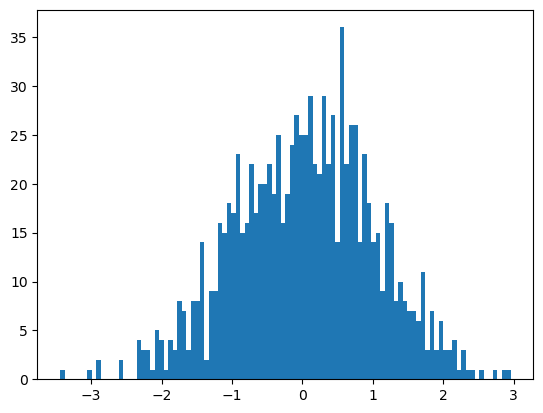

In [160]:
plt.hist(np.random.randn(1000),bins=100)

<AxesSubplot:ylabel='origin'>

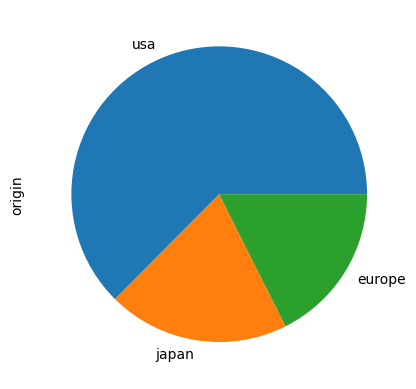

In [165]:
df.origin.value_counts().plot(kind='pie')

<AxesSubplot:>

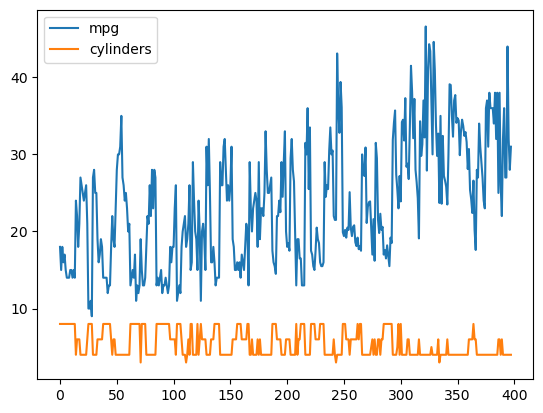

In [170]:
df[['mpg','cylinders']].plot()

In [172]:
dic = {
    '월':np.random.randint(1,13,1000),
    '성별':np.random.choice(['male','female'],1000),
    
}

In [174]:
df = pd.DataFrame(dic)

In [175]:
df

,월,성별
0,12,male
1,9,female
2,12,female
3,6,male
4,3,male
...,...,...
995,6,male
996,4,female
997,4,female
998,3,female


In [181]:
df.value_counts(['월','성별']).reset_index().set_index('월').sort_index()
# 데이터 타입이 시리즈 
# 대부분 아는 것 같다고 하지만 나는 진짜 모름. 

,성별,0
월,,
1,female,53
1,male,40
2,male,36
2,female,46
3,female,36
3,male,42
4,female,42
4,male,37
5,female,43


In [1]:

df = df.value_count)['월','성별'].reset_index()

SyntaxError: unmatched ')' (1495122971.py, line 1)